Aufgabe 44.

Im Datensatz insurance.csv sind Prämienhöhen für Krankenversicherungen in USD (charges) sowie verschiedene Einfussfaktoren wie Alter, BMI, Anzahl der Kinder, Geschlecht, Raucherstatus und Region enthalten.

In [149]:
import pandas as pd
from utils import *
from statsmodels.api import OLS, add_constant
import seaborn as sns
import matplotlib.pyplot as plt

In [150]:
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)
healthy_orange = '#EC6602'
healthy_orange_50 = '#F9B591'
healthy_orange_25 = '#FDDDCB'
siemens_petrol = '#009999'
siemens_petrol_50 = '#87D2D2'
sns.set_palette([healthy_orange, siemens_petrol, healthy_orange_50, healthy_orange_25, siemens_petrol_50])
RANDOM_SEED = 42

In [151]:
df = pd.read_csv('../data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


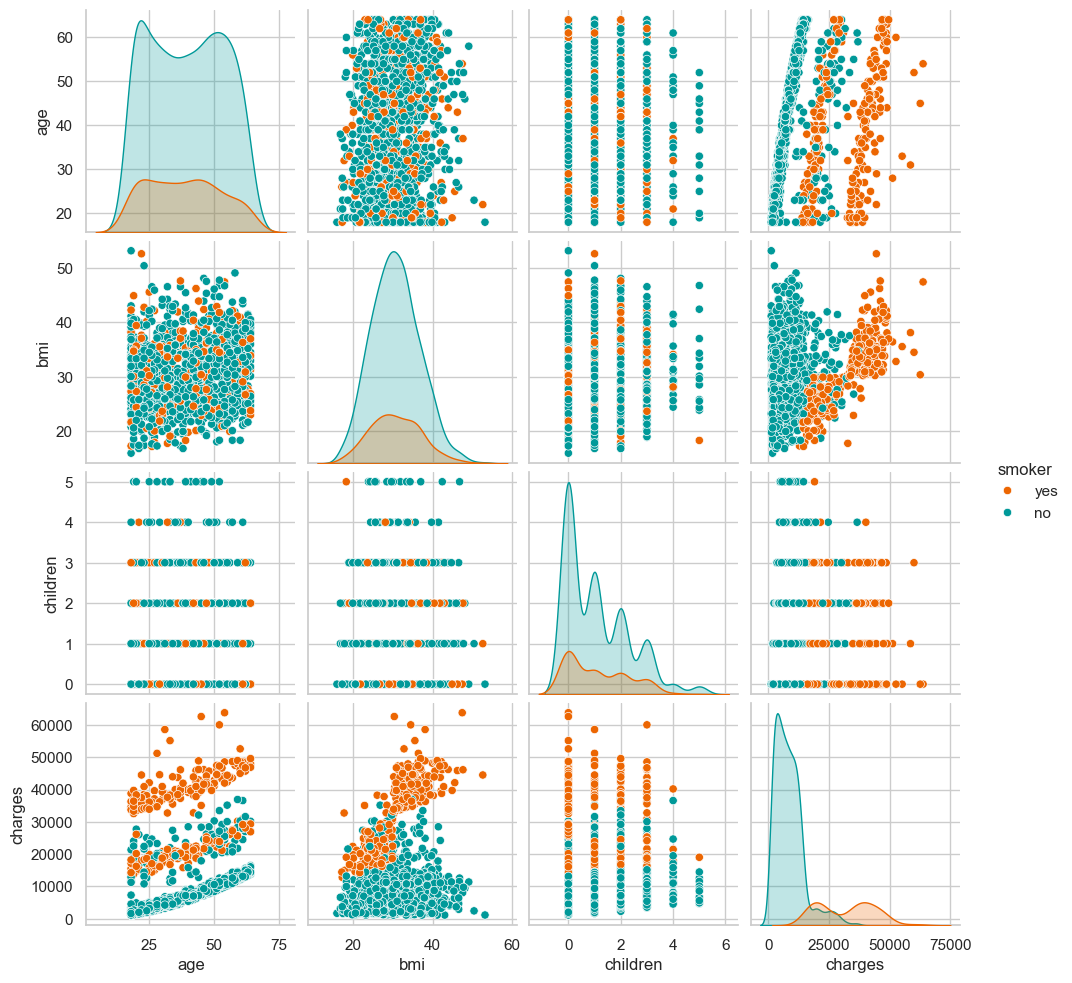

In [152]:
sns.pairplot(df, hue='smoker', diag_kind='kde', palette=[healthy_orange, siemens_petrol]);

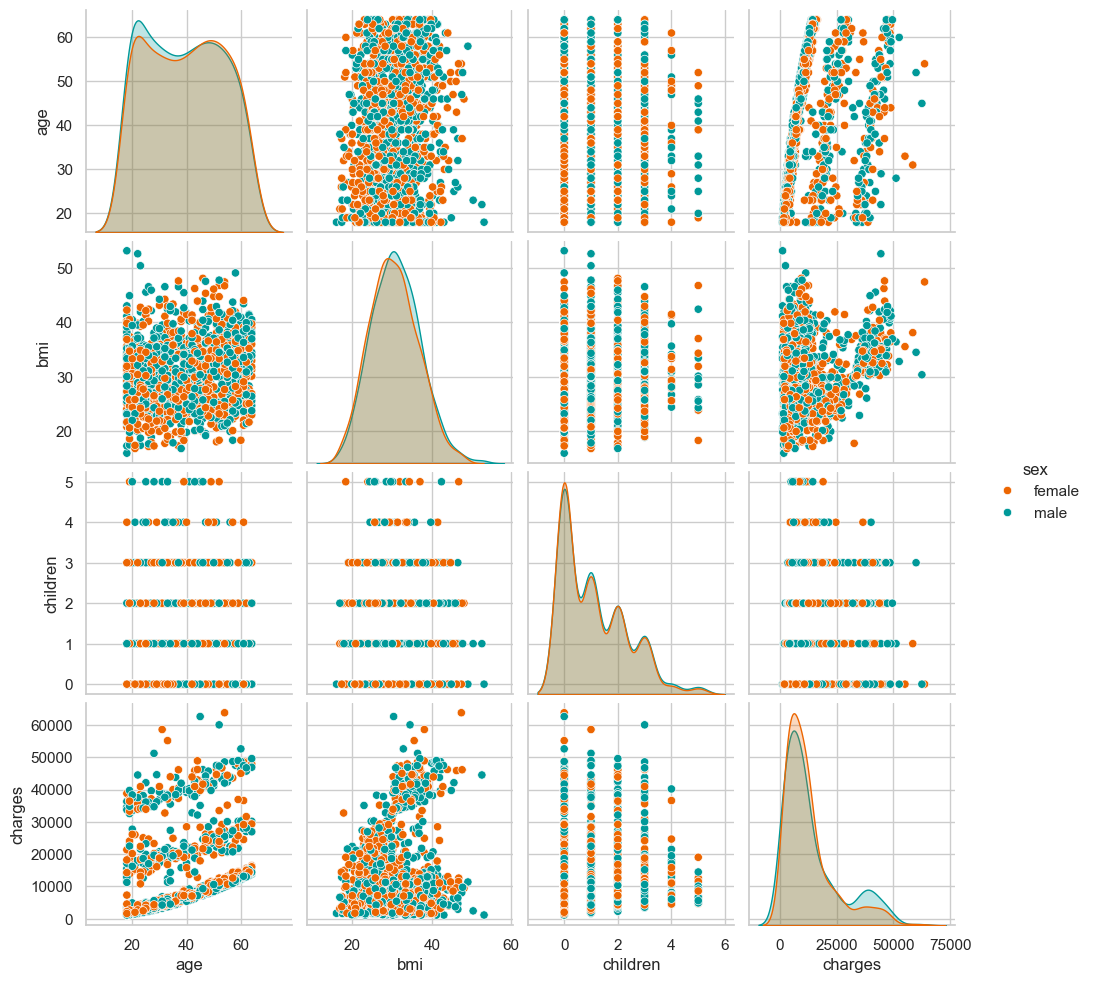

In [153]:
sns.pairplot(df, hue='sex', diag_kind='kde', palette=[healthy_orange, siemens_petrol]);

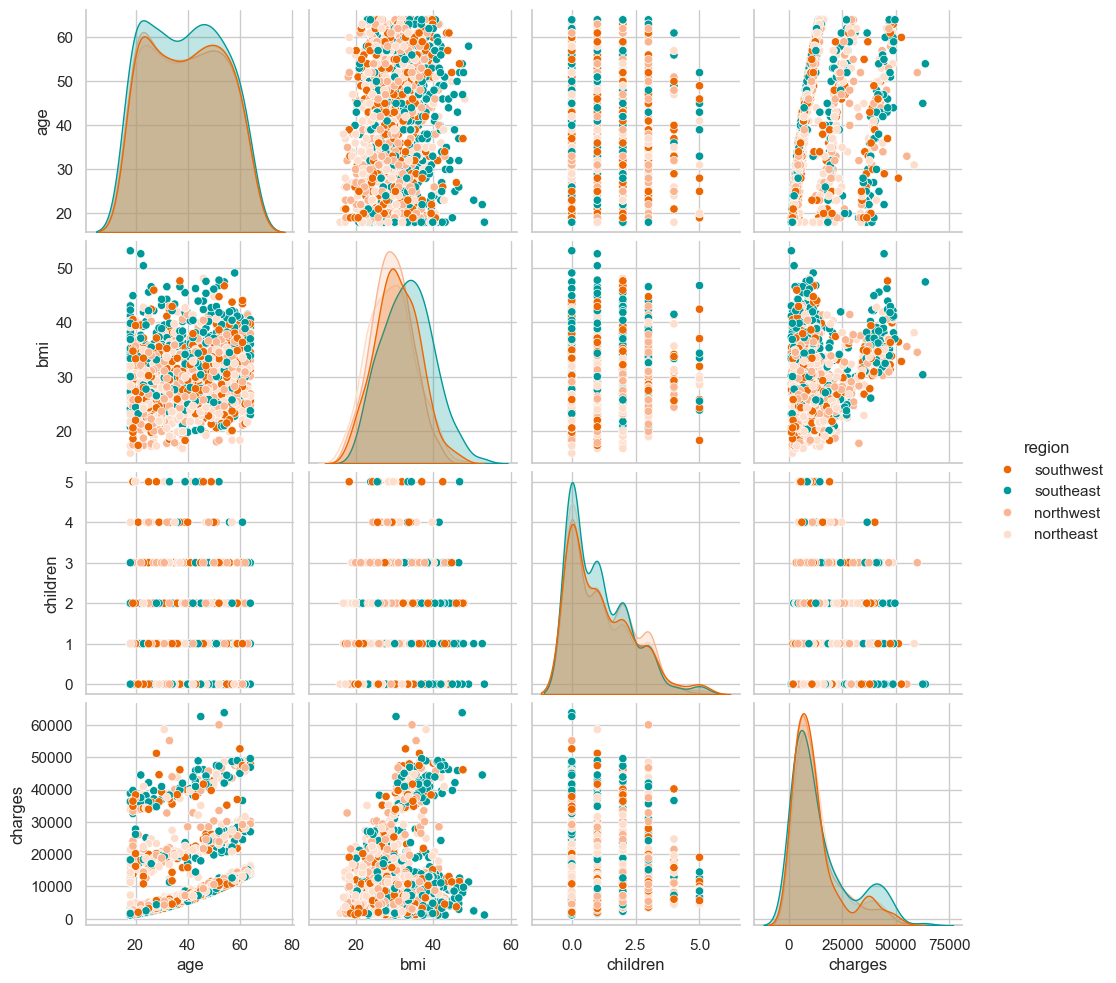

In [154]:
sns.pairplot(df, hue='region', diag_kind='kde');

a) Passen Sie ein Regressionsmodell mit allen numerischen Variablen (age, bmi, children) und dem Faktor smoker an. Bestimmen Sie R2, R2-adj und den F-Wert.

In [155]:
show_missing_values(df)

,Column Name,Min,Max,n Unique,NaN count,NaN percentage,dtype
S. No.,,,,,,,
1,age,18,64,47,0,0.0%,int64
2,sex,nan,nan,2,0,0.0%,object
3,bmi,15.96,53.13,548,0,0.0%,float64
4,children,0,5,6,0,0.0%,int64
5,smoker,nan,nan,2,0,0.0%,object
6,region,nan,nan,4,0,0.0%,object
7,charges,1121.87,63770.43,1337,0,0.0%,float64


In [156]:
df['is_smoker'] = (df.smoker == 'yes').astype(int)
df = df.drop(columns=['smoker'])

In [157]:
X = df[['age', 'bmi', 'children', 'is_smoker']]
y = df['charges']
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Thu, 22 May 2025   Prob (F-statistic):               0.00
Time:                        20:44:34   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.21e+04    941.984    -12.848      0.0

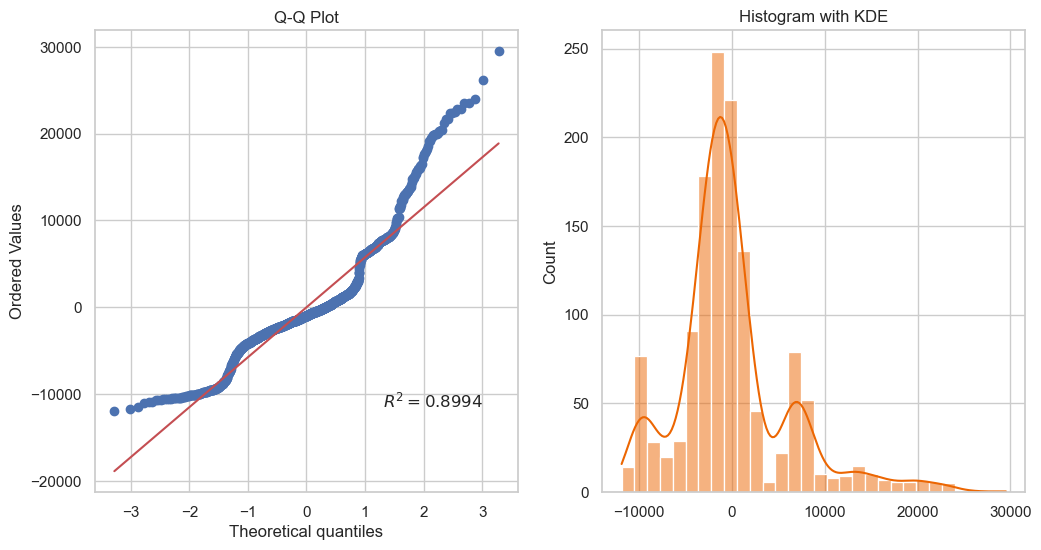

Shapiro-Wilk normality test: p-value = 9.999803799682161e-29
D'Agostino's K^2 normality test: p-value = 3.423446417806652e-66
Kolmogorov-Smirnov normality test: p-value = 1.9628830132598074e-31
Anderson-Darling normality test: statistic = 44.24111131925133, critical value = 0.785


In [158]:
check_normality(model.resid)

> Die Residuen sind nicht normalverteilt. Die Interpretation von Variablen nicht zuverlässig.

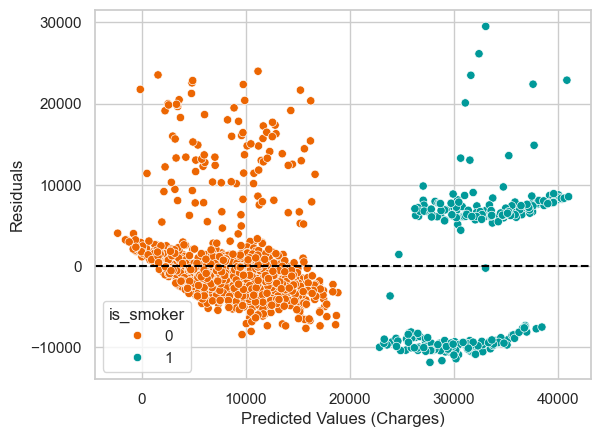

In [159]:
sns.scatterplot(x=model.fittedvalues, y=model.resid, hue=df.is_smoker, palette=[healthy_orange, siemens_petrol]);
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted Values (Charges)')
plt.ylabel('Residuals');

> Die Voraussetzung für Homoskedastizität ist verltetzt, da die Varianz nicht überall gleich ist.

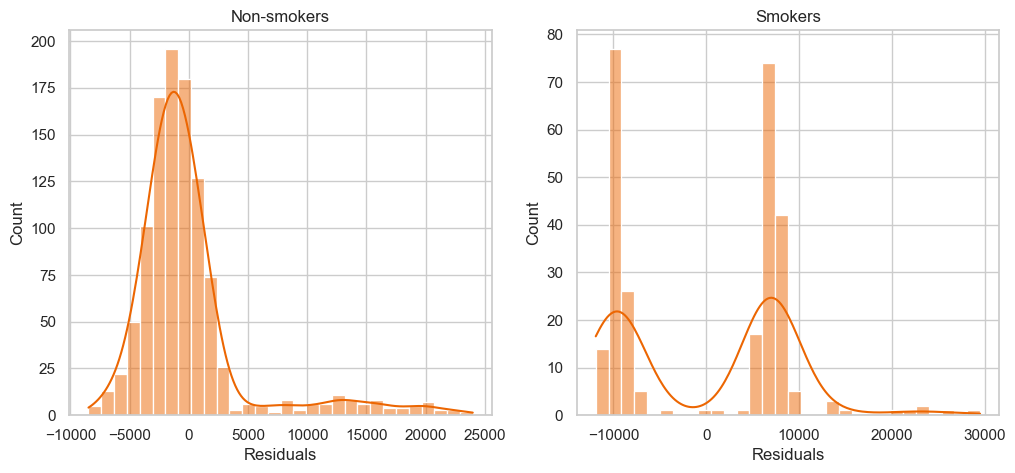

In [160]:
_, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(x=model.resid[df.is_smoker == 0], bins=30, kde=True, color=healthy_orange, ax=axes[0]);
axes[0].set_title('Non-smokers')
axes[0].set_xlabel('Residuals')
sns.histplot(x=model.resid[df.is_smoker == 1], bins=30, kde=True, color=healthy_orange, ax=axes[1]);
axes[1].set_title('Smokers')
axes[1].set_xlabel('Residuals')
plt.show()

> Die Verteilung von Residuen ist sehr unterschiedlich basierend auf Smoker Status.

b) Ermitteln Sie AIC und BIC für dieses Modell. Wie interpretieren Sie die beiden Werte?

- AIC: 27110
- BIC: 27140

Sie sind schwierig zu interpretieren. Ich kann eher diese Werte nur dann interpretieren wenn ich mehrere Versionen von meinem Modell habe.

c) Entfernen Sie die Variable children und passen Sie das Modell erneut an. Wie verändern sich die Kennzahlen aus (1) und (2)?

In [161]:
X = df[['age', 'bmi', 'is_smoker']]
y = df['charges']
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1316.
Date:                Thu, 22 May 2025   Prob (F-statistic):               0.00
Time:                        20:44:34   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1334   BIC:                         2.714e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.168e+04    937.569    -12.454      0.0

- R2: 0.750 -> 0.747
- R2-Adj: 0.749 -> 0.747
- F-Wert: 998.1 -> 1316
- AIC: 27110 -> 27120
- BIC: 27140 -> 27140

d) Führen Sie eine schrittweise Modellwahl durch, bei der Sie jeweils die Variable
hinzufügen, die den AIC am stärksten senkt. Notieren Sie die AIC-Werte.

In [162]:
df['is_male'] = (df.sex == 'male').astype(int)
df = df.drop(columns='sex')

In [163]:
df = pd.get_dummies(df, columns=['region'], drop_first=True, dtype='int')

In [164]:
region = ['region_northwest', 'region_southeast', 'region_southwest'] 

In [165]:
for feature in ['age', 'bmi', 'children', 'is_smoker', 'is_male', region]:
    X = df[feature]
    y = df['charges']
    X = add_constant(X)
    model = OLS(y, X).fit()
    print("="*50)
    print(f'Feature: {feature}')
    print(f'R2: {model.rsquared:.4f}')
    print(f'R2-adj: {model.rsquared_adj:.4f}')
    print(f'AIC: {model.aic:.4f}')

Feature: age
R2: 0.0894
R2-adj: 0.0887
AIC: 28833.9487
Feature: bmi
R2: 0.0393
R2-adj: 0.0386
AIC: 28905.5641
Feature: children
R2: 0.0046
R2-adj: 0.0039
AIC: 28953.0623
Feature: is_smoker
R2: 0.6198
R2-adj: 0.6195
AIC: 27665.4636
Feature: is_male
R2: 0.0033
R2-adj: 0.0025
AIC: 28954.8642
Feature: ['region_northwest', 'region_southeast', 'region_southwest']
R2: 0.0066
R2-adj: 0.0044
AIC: 28954.3573


In [166]:
aic = 27665.4636
for feature in ['age', 'bmi', 'children', 'is_male', region]:
    if feature == region:
        features = ['is_smoker'] + region
    else:
        features = ['is_smoker', feature]
    X = df[features]
    y = df['charges']
    X = add_constant(X)
    model = OLS(y, X).fit()
    print("="*50)
    print(f'Feature: {feature}')
    print(f'R2: {model.rsquared:.4f}')
    print(f'R2-adj: {model.rsquared_adj:.4f}')
    print(f'AIC: {model.aic:.4f}')
    print(f'AIC Difference: {((aic - model.aic) / aic) * 100:.2f}%')

Feature: age
R2: 0.7214
R2-adj: 0.7210
AIC: 27251.3244
AIC Difference: 1.50%
Feature: bmi
R2: 0.6579
R2-adj: 0.6574
AIC: 27525.8903
AIC Difference: 0.50%
Feature: children
R2: 0.6236
R2-adj: 0.6230
AIC: 27653.8861
AIC Difference: 0.04%
Feature: is_male
R2: 0.6198
R2-adj: 0.6192
AIC: 27667.4381
AIC Difference: -0.01%
Feature: ['region_northwest', 'region_southeast', 'region_southwest']
R2: 0.6203
R2-adj: 0.6192
AIC: 27669.5325
AIC Difference: -0.01%


In [167]:
aic = 27251.3244
for feature in ['bmi', 'children', 'is_male', region]:
    if feature == region:
        features = ['is_smoker', 'age'] + region
    else:
        features = ['is_smoker', 'age', feature]
    X = df[features]
    y = df['charges']
    X = add_constant(X)
    model = OLS(y, X).fit()
    print("="*50)
    print(f'Feature: {feature}')
    print(f'R2: {model.rsquared:.4f}')
    print(f'R2-adj: {model.rsquared_adj:.4f}')
    print(f'AIC: {model.aic:.4f}')
    print(f'AIC Difference: {((aic - model.aic) / aic) * 100:.2f}%')

Feature: bmi
R2: 0.7475
R2-adj: 0.7469
AIC: 27121.8359
AIC Difference: 0.48%
Feature: children
R2: 0.7237
R2-adj: 0.7231
AIC: 27242.0272
AIC Difference: 0.03%
Feature: is_male
R2: 0.7214
R2-adj: 0.7208
AIC: 27253.2699
AIC Difference: -0.01%
Feature: ['region_northwest', 'region_southeast', 'region_southwest']
R2: 0.7221
R2-adj: 0.7211
AIC: 27253.9295
AIC Difference: -0.01%


In [168]:
aic = 27121.8359
for feature in ['children', 'is_male', region]:
    if feature == region:
        features = ['is_smoker', 'age', 'bmi'] + region
    else:
        features = ['is_smoker', 'age', 'bmi', feature]
    X = df[features]
    y = df['charges']
    X = add_constant(X)
    model = OLS(y, X).fit()
    print("="*50)
    print(f'Feature: {feature}')
    print(f'R2: {model.rsquared:.4f}')
    print(f'R2-adj: {model.rsquared_adj:.4f}')
    print(f'AIC: {model.aic:.4f}')
    print(f'AIC Difference: {((aic - model.aic) / aic) * 100:.2f}%')

Feature: children
R2: 0.7497
R2-adj: 0.7489
AIC: 27112.0352
AIC Difference: 0.04%
Feature: is_male
R2: 0.7475
R2-adj: 0.7467
AIC: 27123.7294
AIC Difference: -0.01%
Feature: ['region_northwest', 'region_southeast', 'region_southwest']
R2: 0.7487
R2-adj: 0.7475
AIC: 27121.5515
AIC Difference: 0.00%


In [169]:
aic = 27112.0352
for feature in ['is_male', region]:
    if feature == region:
        features = ['is_smoker', 'age', 'bmi', 'children'] + region
    else:
        features = ['is_smoker', 'age', 'bmi', 'children', feature]
    X = df[features]
    y = df['charges']
    X = add_constant(X)
    model = OLS(y, X).fit()
    print("="*50)
    print(f'Feature: {feature}')
    print(f'R2: {model.rsquared:.4f}')
    print(f'R2-adj: {model.rsquared_adj:.4f}')
    print(f'AIC: {model.aic:.4f}')
    print(f'AIC Difference: {((aic - model.aic) / aic) * 100:.2f}%')

Feature: is_male
R2: 0.7497
R2-adj: 0.7488
AIC: 27113.8856
AIC Difference: -0.01%
Feature: ['region_northwest', 'region_southeast', 'region_southwest']
R2: 0.7509
R2-adj: 0.7496
AIC: 27111.6624
AIC Difference: 0.00%


In [170]:
X = df[['is_smoker', 'age', 'bmi', 'children']]
y = df['charges']
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Thu, 22 May 2025   Prob (F-statistic):               0.00
Time:                        20:44:34   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.21e+04    941.984    -12.848      0.0

e) Welches Modell würden Sie für eine Preisvorhersage in einem Online-Rechner verwenden? Begründen Sie Ihre Entscheidung.

Ich würde das Modell mit Features ['smoker', 'age', 'bmi', 'children'] verwenden. Das hat hochste R2 bzw. R2 Adjusted, alle signifikante Features. Ich meine ich habe ja keine andere Wahl in diesem Fall.

f) Nennen Sie zwei Gründe, warum man ein einfacheres Modell trotz schlechterem Fit bevorzugen kann.

- Wenn z.B. interpretation (inferenz) sehr wichtig ist und dadurch dass eindachere Modelle lassen sich einfacher interpretieren und Zusammenhänge erklären als komplizierte Modelle, vor allem weil man Multikollinearitätsproblem so wenig wie Möglich hat.

- Weil komplexere Modelle manchmal Features brauchen, die entweder nicht zuverlässig sind oder sehr schwierig zu erheben sind.

### Interaktionsterme

In [201]:
X = df[['is_smoker', 'age', 'bmi', 'children']].copy()
X['smoker_x_age'] = X['is_smoker'] * X['age']
X['smoker_x_bmi'] = X['is_smoker'] * X['bmi']
y = df['charges']
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1155.
Date:                Thu, 22 May 2025   Prob (F-statistic):               0.00
Time:                        21:06:01   Log-Likelihood:                -13256.
No. Observations:                1338   AIC:                         2.653e+04
Df Residuals:                    1331   BIC:                         2.656e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2745.8030    844.858     -3.250   

In [202]:
X = df[['is_smoker', 'age', 'bmi', 'children']].copy()
X['smoker_x_bmi'] = X['is_smoker'] * X['bmi']
y = df['charges']
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1387.
Date:                Thu, 22 May 2025   Prob (F-statistic):               0.00
Time:                        21:06:26   Log-Likelihood:                -13256.
No. Observations:                1338   AIC:                         2.652e+04
Df Residuals:                    1332   BIC:                         2.656e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2729.0019    831.270     -3.283   